In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [144]:
actions = pd.read_json('../exported/actions.json')
actions['_id'] = actions.apply(lambda x: x['_id']['$oid'], axis=1)

In [145]:
users = pd.read_json('../exported/users.json')
users['_id'] = users.apply(lambda x: x['_id']['$oid'], axis=1)

In [146]:
usersSeries = actions.apply(lambda x: x['user'], axis=1)
actions['user_id'] = usersSeries.map(lambda userObject: userObject["$oid"], na_action='ignore')
del usersSeries

In [147]:
actions = actions.merge(users, how='left', left_on='user_id', right_on='_id')

In [148]:
confessions = pd.read_json('../exported/confessions.json')

In [149]:
confessions['_id'] = confessions.apply(lambda x: x['_id']['$oid'], axis=1)

In [150]:
active_moderators = actions['username'].dropna().unique()

In [206]:
moderator_actions_count = actions[['_id_x','username']].groupby("username").count().reset_index()

In [207]:
moderator_actions_count.columns

Index(['username', '_id_x'], dtype='object')

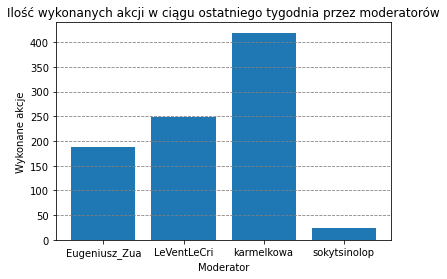

In [220]:
plot.grid(color='gray', linestyle='dashed', axis='y')
plot.bar(moderator_actions_count['username'], height=moderator_actions_count['_id_x'])
plot.ylabel('Wykonane akcje')
plot.xlabel('Moderator')
plot.title('Ilość wykonanych akcji w ciągu ostatniego tygodnia przez moderatorów')

plot.show()

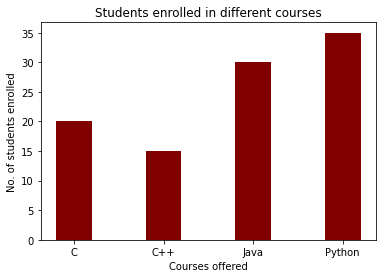

In [185]:
data = {'C':20, 'C++':15, 'Java':30,
        'Python':35}
courses = list(data.keys())
values = list(data.values())

 
# creating the bar plot
plot.bar(courses, values, color ='maroon',
        width = 0.4)
 
plot.xlabel("Courses offered")
plot.ylabel("No. of students enrolled")
plot.title("Students enrolled in different courses")
plot.show()